# Calculating Stock Returns using Pandas DataFrames

In this exercise you will learn how to calculate daily stock returns and cumulative stock returns
using the average daily price.

The average daily price is defined as:

average_daily_price = (open + close + high + low) / 4

## 1. Import Libaries and Dependencies
  - Import the `pandas` and `pathlib` libraries, and set the `%matplotlib inline` property.

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Create a Path to the File Using Pathlib
  - Create a variable `csvpath` that represents the path to the [MSFT.csv](../Resources/MSFT.csv) using the Pathlib library.

In [2]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path('../Resources/MSFT.csv')

## 3. Read CSV in as DataFrame
  - Read the CSV into a Pandas DataFrame. Use the `index_col` parameter to set the index to be the `date` column. Set `parse_dates` and `infer_datetime_format` to `True`.

In [3]:
# Read in the CSV as a DataFrame
msft_df = pd.read_csv(csv_path,index_col='date', parse_dates=True, infer_datetime_format=True)
msft_df.head()

,close,volume,open,high,low
date,,,,,
2009-08-03,23.83,46843710,23.82,23.86,23.50
2009-08-04,23.77,49116380,23.68,23.79,23.53
2009-08-05,23.81,53263040,23.84,24.25,23.79
2009-08-06,23.46,59655950,23.93,23.98,23.27
2009-08-07,23.56,46165010,23.75,23.82,23.50


## 4. Drop Volume Column


In [4]:
# Drop volume column
msft_df.drop(columns=['volume'], inplace=True)
msft_df.head()

,close,open,high,low
date,,,,
2009-08-03,23.83,23.82,23.86,23.50
2009-08-04,23.77,23.68,23.79,23.53
2009-08-05,23.81,23.84,24.25,23.79
2009-08-06,23.46,23.93,23.98,23.27
2009-08-07,23.56,23.75,23.82,23.50


## 5. Calculate Daily Average Price
  - Use the mean() method with axis = 1
  - Save the average price into a new column in the dataframe

  - Hint: Remember that dataframes are concatenation of series


In [5]:
# Calculate the daily average price
msft_df['avg_price'] = msft_df.mean(axis=1)
msft_df.head()

,close,open,high,low,avg_price
date,,,,,
2009-08-03,23.83,23.82,23.86,23.50,23.7525
2009-08-04,23.77,23.68,23.79,23.53,23.6925
2009-08-05,23.81,23.84,24.25,23.79,23.9225
2009-08-06,23.46,23.93,23.98,23.27,23.6600
2009-08-07,23.56,23.75,23.82,23.50,23.6575


## 6. Plot the average daily values of MSFT

<AxesSubplot:xlabel='date'>

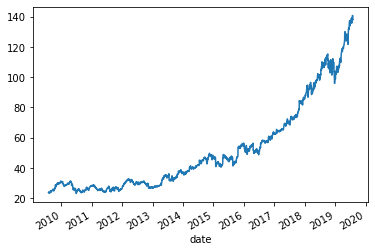

In [6]:
# Plot the average daily stock price of MSFT over the last 5 years
msft_df['avg_price'].plot()

## 7. Calculate Daily Returns
  - Use the `pct_change` function to calculate the daily returns of MSFT

In [7]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = msft_df['avg_price'].pct_change()
daily_returns.head()

date
2009-08-03         NaN
2009-08-04   -0.002526
2009-08-05    0.009708
2009-08-06   -0.010973
2009-08-07   -0.000106
Name: avg_price, dtype: float64

## 8. Plot the daily return values for MSFT

<AxesSubplot:xlabel='date'>

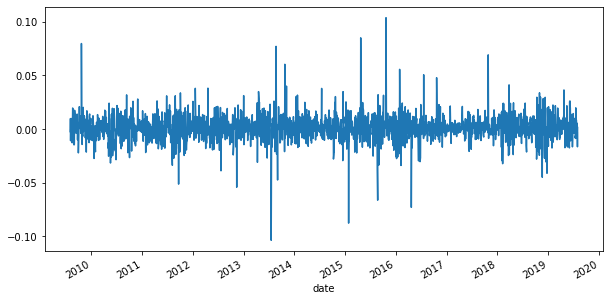

In [8]:
# Plot the daily returns of MSFT over the last 10 years
daily_returns.plot(figsize=(10,5))

## 9. Calculate Cumulative Returns
  -  Use the `cumprod` function to calculate the cumulative returns of MSFT

In [9]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

date
2009-08-03         NaN
2009-08-04   -0.002526
2009-08-05    0.007157
2009-08-06   -0.003894
2009-08-07   -0.004000
                ...   
2019-07-26    4.932902
2019-07-29    4.929968
2019-07-30    4.910014
2019-07-31    4.811704
2019-08-01    4.819685
Name: avg_price, Length: 2517, dtype: float64

## 10. Plot cumulative return values for MSFT

<AxesSubplot:title={'center':'Cumulative Returns of MSFT over the Last 10 Years'}, xlabel='date'>

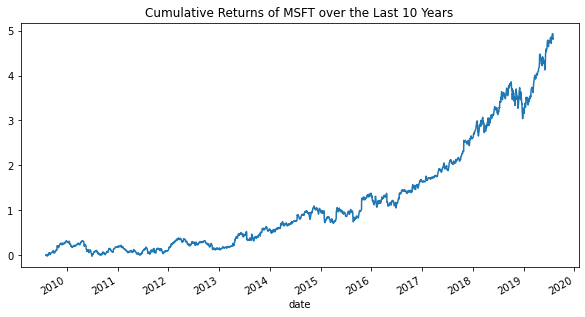

In [10]:
# Plot the daily returns of the S&P 500 over the last 5 years
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of MSFT over the Last 10 Years")